Max Depth: 1
Confusion Matrix:
[[30  8]
 [ 8 44]]
Accuracy: 0.82


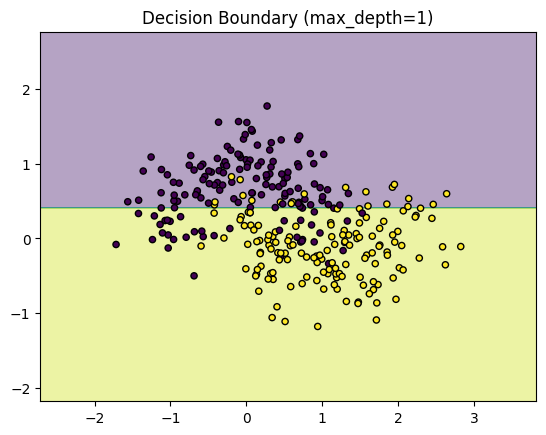

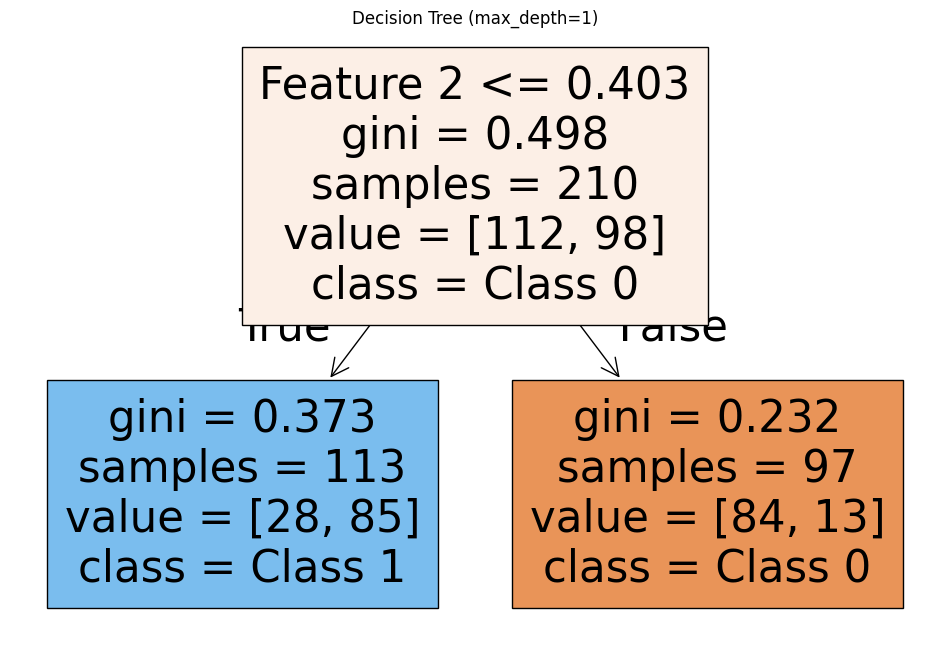

Max Depth: 3
Confusion Matrix:
[[33  5]
 [ 4 48]]
Accuracy: 0.90


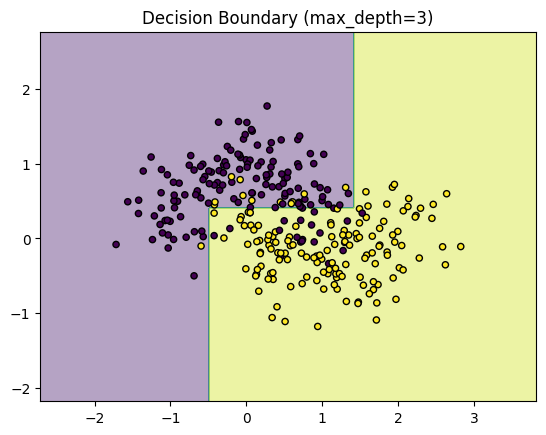

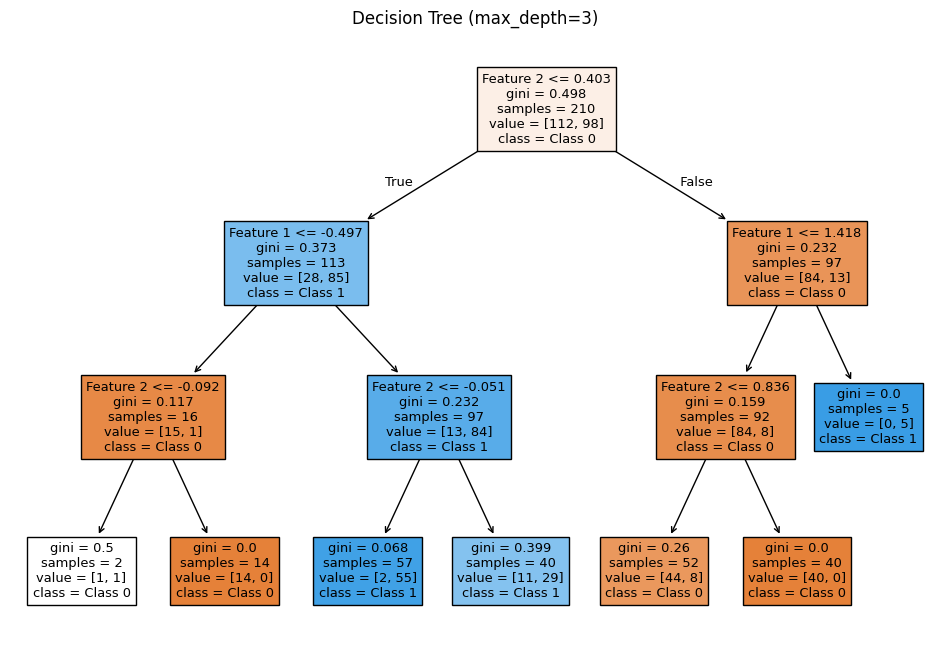

Max Depth: 5
Confusion Matrix:
[[31  7]
 [ 5 47]]
Accuracy: 0.87


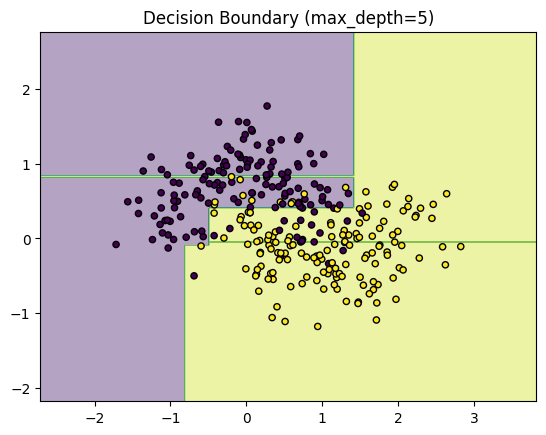

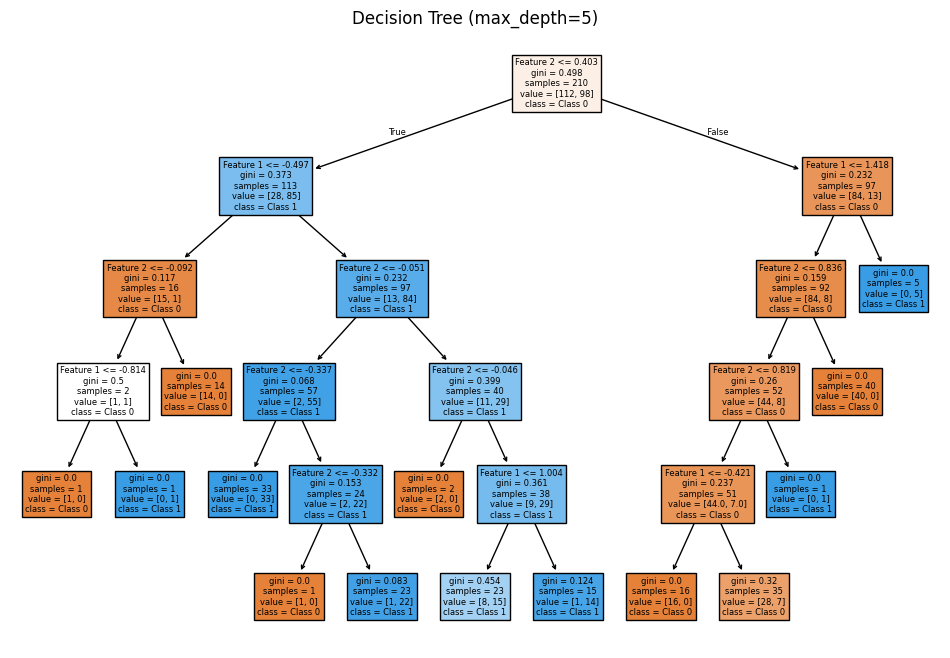

Max Depth: None
Confusion Matrix:
[[30  8]
 [ 5 47]]
Accuracy: 0.86


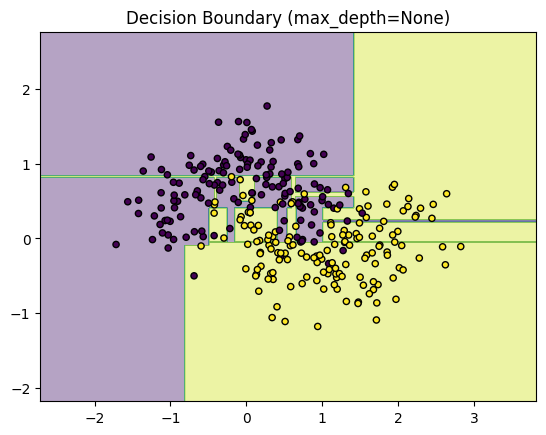

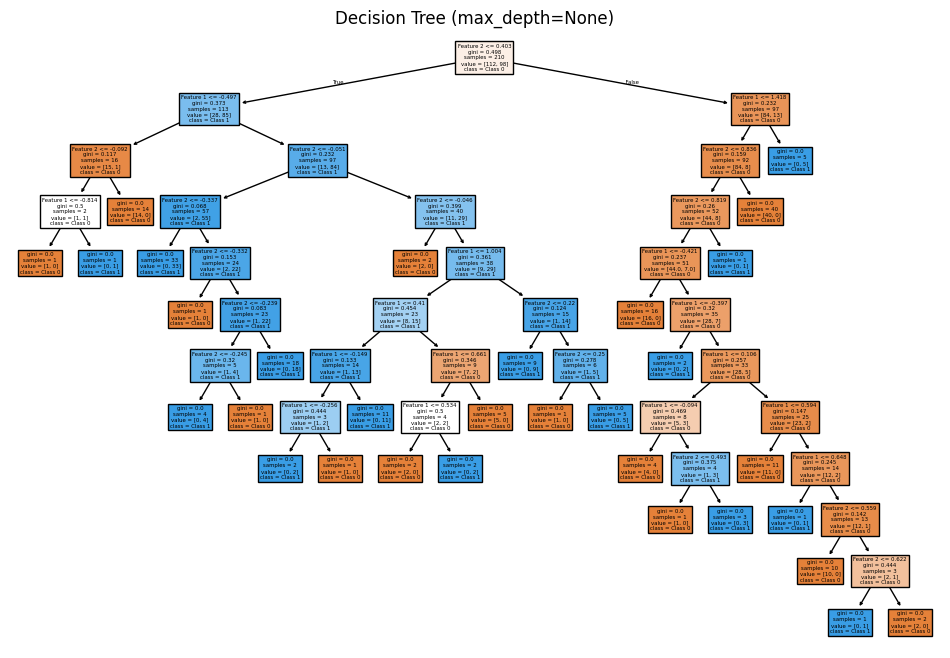

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score

# Generate a synthetic "crescent" dataset
X, y = make_moons(n_samples=300, noise=0.3, random_state=42)

# Splitting data into training and testing samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function for visualizing decision boundaries
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=20)
    plt.title(title)
    plt.show()

# Creating and training a decision tree with different pruning levels
for max_depth in [1, 3, 5, None]:
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Output of validation metrics
    print(f"Max Depth: {max_depth}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

    # Visualization of the decision boundary
    plot_decision_boundary(clf, X, y, f"Decision Boundary (max_depth={max_depth})")

    # Visualization of the decision tree
    plt.figure(figsize=(12, 8))
    plot_tree(clf, filled=True, feature_names=['Feature 1', 'Feature 2'], class_names=['Class 0', 'Class 1'])
    plt.title(f"Decision Tree (max_depth={max_depth})")
    plt.show()
